<a href="https://colab.research.google.com/github/Sh-Hi-Go/MS_Eng_Proj/blob/main/KN_annINTRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("Churn_Modelling.csv")
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,1]

In [ ]:
# create dummy variables
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

X = pd.concat([X, gender, geography], axis = 1)
X = X.drop(['Geography', 'Gender'], axis = 1)
print(X)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Male  Germany  Spain  
0                  1        101348.88     0        0      0  
1                  1   

In [ ]:
# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.transform(X_test)

#### making the ANN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
# initialise
classifier = Sequential()

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11))

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dropout(0.3))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# compiling the ANN
classifier.compile(optimizer = 'Adamax', loss='binary_crossentropy', metrics = ['accuracy'])

# fitting the ANN to training data
model_history =  classifier.fit(X_train, y_train, validation_split = 0.33, batch_size=10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: -80213936.0000 - accuracy: 0.0000e+00 - val_loss: -150023888.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: -267934624.0000 - accuracy: 0.0000e+00 - val_loss: -420245056.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
536/536 [==============================] - 1s 3ms/step - loss: -641463040.0000 - accuracy: 0.0000e+00 - val_loss: -915589184.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: -1291607552.0000 - accuracy: 0.0000e+00 - val_loss: -1729928064.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: -2323323904.0000 - accuracy: 0.0000e+00 - val_loss: -3011751168.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: -3849811200.0000 - accuracy: 0.0000e+00 - val_loss: -4854915584.0000 - val_ac

In [ ]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


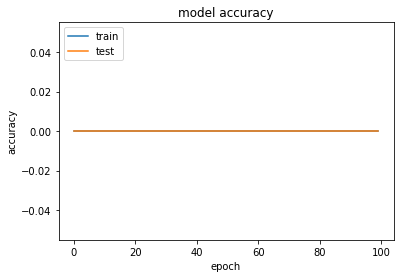

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

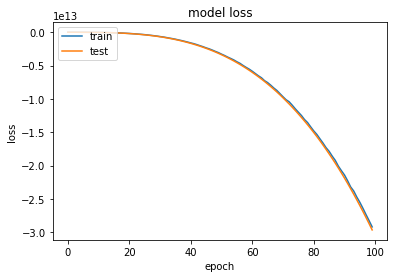

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### predicting the results and evaluating the model

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

63/63 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score
acc =  accuracy_score(y_test, y_pred)

In [ ]:
print(cm)
print(acc)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
0.0
